In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import olympus
from olympus import __home__
from olympus.datasets import Dataset
from olympus.emulators import Emulator
from olympus.objects import ParameterVector
from olympus.models import BayesNeuralNet

## Train `electrochem` dataset emulator

In [42]:
dataset = Dataset(kind='electrochem', random_seed=100703, test_frac=0.3)
dataset.data

,ligand,metal,num_mixing,ligand_metal_ratio,voltage
0,Pyridine,Copper(II),7.0,6.638719,-0.121672
1,Pyridine,Silver(I),9.0,5.066545,0.07888
2,Ethylenediamine,Copper(II),10.0,7.427776,-0.100707
3,Ethylenediamine,Silver(I),8.0,8.931573,0.004709
4,Ethylenediamine,Copper(II),5.0,5.116949,-0.089873
5,Pyridine,Silver(I),10.0,1.0,0.004531
6,H20,Silver(I),1.0,5.057622,0.224901
7,H20,Silver(I),10.0,3.977553,0.015229
8,H20,Silver(I),10.0,8.694013,0.08958
9,Ethylenediamine,Copper(II),10.0,1.047863,-0.07891


In [46]:
params = {
    'batch_size':10, 
    'hidden_act':'leaky_relu',
    'hidden_depth':2,
    'hidden_nodes':48,
    'learning_rate':4e-5,
    'reg': 0.1,
}

model = BayesNeuralNet(task='regression', **params, out_act='linear')

emulator = Emulator(
    dataset=dataset, 
    model=model,
    feature_transform='standardize',
     target_transform='identity',
)

emulator.train(retrain=True)

[INFO] >>> Training model on 80% of the dataset, testing on 20%...


/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


[INFO]     =======================================================================
[INFO]           Epoch       Train R2     Train RMSD        Test R2      Test RMSD
[INFO]     =======================================================================
[INFO]               0         -4.598          0.497         -5.454          0.378 *
[INFO]             100         -3.185          0.430         -3.290          0.308 *
[INFO]             200         -2.116          0.371         -2.413          0.275 *
[INFO]             300         -1.394          0.325         -2.048          0.259 *
[INFO]             400         -0.682          0.272         -2.620          0.283
[INFO]             500         -0.353          0.244         -2.947          0.295
[INFO]             600         -0.059          0.216         -3.139          0.302
[INFO]             700          0.130          0.196         -1.679          0.243 *
[INFO]             800          0.182          0.190         -1.483          

InvalidArgumentError: Graph execution error:

Detected at node 'model/sequential/dense_local_reparameterization/KullbackLeibler/IndependentNormal_CONSTRUCTED_AT_model_sequential_dense_local_reparameterization/KullbackLeibler_a/IndependentNormal_1/KullbackLeibler_b/KullbackLeibler/Normal/KullbackLeibler_a/Normal_1/KullbackLeibler_b/KullbackLeibler/add' defined at (most recent call last):
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_34199/3402637280.py", line 19, in <module>
      emulator.train(retrain=True)
    File "/Users/rileyhickman/Research/olympus/src/olympus/emulators/emulator.py", line 499, in train
      ) = self.model.train(
    File "/Users/rileyhickman/Research/olympus/src/olympus/models/wrapper_tensorflow_model/wrapper_tensorflow_model.py", line 110, in train
      self._build_inference()
    File "/Users/rileyhickman/Research/olympus/src/olympus/models/model_bayes_neural_net/wrapper_bayes_neural_net.py", line 96, in _build_inference
      self.y_pred = self.neural_net(self.tf_x)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/engine/base_layer_v1.py", line 838, in __call__
      outputs = call_fn(cast_inputs, *args, **kwargs)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 420, in call
      outputs = layer(inputs, **kwargs)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/engine/base_layer_v1.py", line 838, in __call__
      outputs = call_fn(cast_inputs, *args, **kwargs)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/dense_variational.py", line 175, in call
      self._apply_divergence(
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/dense_variational.py", line 301, in _apply_divergence
      divergence_fn(
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/dense_variational.py", line 508, in <lambda>
      kernel_divergence_fn=lambda q, p, ignore: kl_lib.kl_divergence(q, p),
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/distributions/kullback_leibler.py", line 100, in kl_divergence
      kl_t = kl_fn(distribution_a, distribution_b, name=name)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/distributions/independent.py", line 419, in _kl_independent
      kullback_leibler.kl_divergence(p, q, name=name), axis=reduce_dims)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/distributions/kullback_leibler.py", line 100, in kl_divergence
      kl_t = kl_fn(distribution_a, distribution_b, name=name)
    File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/distributions/normal.py", line 275, in _kl_normal_normal
      0.5 * tf.math.squared_difference(a.loc / b_scale, b.loc / b_scale) +
Node: 'model/sequential/dense_local_reparameterization/KullbackLeibler/IndependentNormal_CONSTRUCTED_AT_model_sequential_dense_local_reparameterization/KullbackLeibler_a/IndependentNormal_1/KullbackLeibler_b/KullbackLeibler/Normal/KullbackLeibler_a/Normal_1/KullbackLeibler_b/KullbackLeibler/add'
Incompatible shapes: [0] vs. [7,48]
	 [[{{node model/sequential/dense_local_reparameterization/KullbackLeibler/IndependentNormal_CONSTRUCTED_AT_model_sequential_dense_local_reparameterization/KullbackLeibler_a/IndependentNormal_1/KullbackLeibler_b/KullbackLeibler/Normal/KullbackLeibler_a/Normal_1/KullbackLeibler_b/KullbackLeibler/add}}]]

Original stack trace for 'model/sequential/dense_local_reparameterization/KullbackLeibler/IndependentNormal_CONSTRUCTED_AT_model_sequential_dense_local_reparameterization/KullbackLeibler_a/IndependentNormal_1/KullbackLeibler_b/KullbackLeibler/Normal/KullbackLeibler_a/Normal_1/KullbackLeibler_b/KullbackLeibler/add':
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start()
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
    self.io_loop.start()
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
    self.asyncio_loop.run_forever()
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    handle._run()
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
    await self.process_one()
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
    await dispatch(*args)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
    await result
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
    reply_content = await reply_content
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
    res = shell.run_cell(
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
    result = self._run_cell(
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
    result = runner(coro)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_34199/3402637280.py", line 19, in <module>
    emulator.train(retrain=True)
  File "/Users/rileyhickman/Research/olympus/src/olympus/emulators/emulator.py", line 499, in train
    ) = self.model.train(
  File "/Users/rileyhickman/Research/olympus/src/olympus/models/wrapper_tensorflow_model/wrapper_tensorflow_model.py", line 110, in train
    self._build_inference()
  File "/Users/rileyhickman/Research/olympus/src/olympus/models/model_bayes_neural_net/wrapper_bayes_neural_net.py", line 96, in _build_inference
    self.y_pred = self.neural_net(self.tf_x)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/engine/training.py", line 569, in __call__
    return super().__call__(*args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/engine/base_layer_v1.py", line 838, in __call__
    outputs = call_fn(cast_inputs, *args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 690, in wrapper
    return converted_call(f, args, kwargs, options=options)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 331, in converted_call
    return _call_unconverted(f, args, kwargs, options, False)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 459, in _call_unconverted
    return f(*args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 420, in call
    outputs = layer(inputs, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/keras/src/engine/base_layer_v1.py", line 838, in __call__
    outputs = call_fn(cast_inputs, *args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 690, in wrapper
    return converted_call(f, args, kwargs, options=options)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 331, in converted_call
    return _call_unconverted(f, args, kwargs, options, False)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 459, in _call_unconverted
    return f(*args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/dense_variational.py", line 175, in call
    self._apply_divergence(
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/dense_variational.py", line 301, in _apply_divergence
    divergence_fn(
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/dense_variational.py", line 508, in <lambda>
    kernel_divergence_fn=lambda q, p, ignore: kl_lib.kl_divergence(q, p),
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/distributions/kullback_leibler.py", line 100, in kl_divergence
    kl_t = kl_fn(distribution_a, distribution_b, name=name)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/distributions/independent.py", line 419, in _kl_independent
    kullback_leibler.kl_divergence(p, q, name=name), axis=reduce_dims)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/distributions/kullback_leibler.py", line 100, in kl_divergence
    kl_t = kl_fn(distribution_a, distribution_b, name=name)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/distributions/normal.py", line 275, in _kl_normal_normal
    0.5 * tf.math.squared_difference(a.loc / b_scale, b.loc / b_scale) +
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/ops/math_ops.py", line 1466, in binary_op_wrapper
    return func(x, y, name=name)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py", line 1176, in op_dispatch_handler
    return dispatch_target(*args, **kwargs)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/ops/math_ops.py", line 1837, in _add_dispatch
    return gen_math_ops.add_v2(x, y, name=name)
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/ops/gen_math_ops.py", line 475, in add_v2
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/framework/op_def_library.py", line 795, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 3381, in _create_op_internal
    ret = Operation.from_node_def(


In [44]:
test_feats = dataset.test_set_features.values
test_targs = dataset.test_set_targets.values
train_feats = dataset.train_set_features.values
train_targs = dataset.train_set_targets.values

mu_test, sigma_ep_test, sigma_al_test = emulator.run(test_feats, num_samples=100)
mu_train, sigma_ep_train, sigma_al_train = emulator.run(train_feats, num_samples=100)

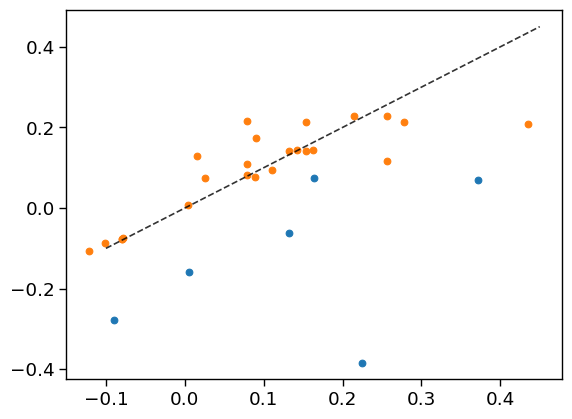

In [45]:
plt.scatter(test_targs, mu_test)
plt.scatter(train_targs, mu_train)

plt.plot([-0.1, 0.45], [-0.1, 0.45], ls='--', zorder=5, c='k', alpha=0.8)

## Train `perovskites` dataset emulator

In [61]:
dataset = Dataset(kind='perovskites')

params = {
    'batch_size':50, 
    'hidden_act':'leaky_relu',
    'hidden_depth':4,
    'hidden_nodes':48,
    'learning_rate':1e-4,
    'reg': 0.01,
}

model = BayesNeuralNet(task='regression', **params, out_act='relu')

emulator = Emulator(
        dataset=dataset,
        model=model,
        feature_transform='identity',
        target_transform='mean',
    )

In [62]:
emulator.train()

[INFO] >>> Training model on 80% of the dataset, testing on 20%...


/home/riley/Software/anaconda3/envs/olympus/lib/python3.7/site-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  trainable=trainable)
/home/riley/Software/anaconda3/envs/olympus/lib/python3.7/site-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  trainable=trainable)


[INFO]     =======================================================================
[INFO]           Epoch       Train R2     Train RMSD        Test R2      Test RMSD
[INFO]     =======================================================================
[INFO]               0         -8.193          1.035         -8.178          1.108 *
[INFO]             100         -5.306          0.857         -5.464          0.930 *
[INFO]             200         -0.990          0.481         -1.141          0.535 *
[INFO]             300          0.210          0.303          0.181          0.331 *
[INFO]             400          0.536          0.232          0.459          0.269 *
[INFO]             500          0.697          0.188          0.687          0.205 *
[INFO]             600          0.821          0.144          0.834          0.149 *
[INFO]             700          0.886          0.115          0.852          0.141 *
[INFO]             800          0.900          0.108          0.931    

[INFO]            8500          0.981          0.047          0.957          0.075
[INFO]            8600          0.979          0.050          0.971          0.062
[INFO]            8700          0.980          0.049          0.956          0.077
[INFO]            8800          0.982          0.045          0.956          0.077
[INFO]            8900          0.978          0.050          0.971          0.062
[INFO]            9000          0.982          0.046          0.943          0.088
[INFO]            9100          0.981          0.047          0.966          0.067
[INFO]            9200          0.980          0.048          0.969          0.064
[INFO]            9300          0.985          0.042          0.973          0.060 *
[INFO]            9400          0.984          0.043          0.964          0.069
[INFO]            9500          0.983          0.044          0.956          0.077
[INFO]            9600          0.983          0.045          0.972          0.061
[I

[INFO]           17400          0.994          0.026          0.963          0.070
[INFO]           17500          0.994          0.026          0.961          0.072
[INFO]           17600          0.993          0.029          0.969          0.064
[INFO]           17700          0.995          0.025          0.961          0.072
[INFO]           17800          0.995          0.025          0.967          0.066
[INFO]           17900          0.994          0.027          0.968          0.066
[INFO]           18000          0.994          0.025          0.971          0.062
[INFO]           18100          0.994          0.026          0.977          0.056
[INFO]           18200          0.994          0.026          0.960          0.073
[INFO]           18300          0.993          0.029          0.963          0.070
[INFO]           18400          0.994          0.026          0.960          0.073
[INFO]           18500          0.994          0.026          0.967          0.067
[INF

{'train_r2': 0.9975356460717245,
 'test_r2': 0.9641150008094033,
 'train_rmsd': 0.055309247127733316,
 'test_rmsd': 0.22719023966366497}

In [56]:
test_feats = dataset.test_set_features.values
test_targs = dataset.test_set_targets.values
train_feats = dataset.train_set_features.values
train_targs = dataset.train_set_targets.values
print(test_feats.shape)
type(test_feats)

(38, 3)


numpy.ndarray

In [57]:
mu_test, sigma_ep_test, sigma_al_test = emulator.run(test_feats, num_samples=100)
mu_train, sigma_ep_train, sigma_al_train = emulator.run(train_feats, num_samples=100)

In [58]:
mu.shape, sigma_ep_test.shape

((38, 1), (38, 1))

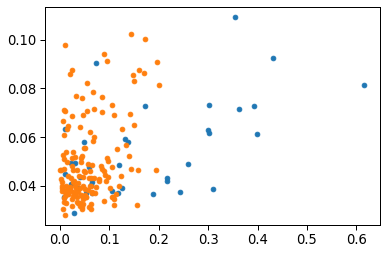

In [59]:
plt.scatter(np.abs(mu_test-test_targs), sigma_ep_test,  label='test set')
plt.scatter(np.abs(mu_train-train_targs), sigma_ep_train,  label='train set')

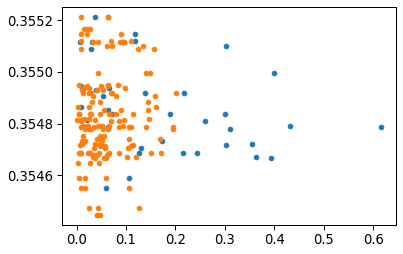

In [60]:
plt.scatter(np.abs(mu_test-test_targs), sigma_al_test,  label='test set')
plt.scatter(np.abs(mu_train-train_targs), sigma_al_train,  label='train set')

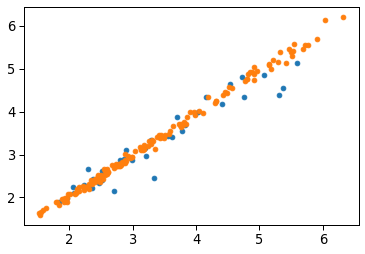

In [24]:
plt.scatter(test_targs, mu_test)
plt.scatter(train_targs, mu_train)
